# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott)

# Lecture 2: Numerical Differentiation

## Learning objectives:

* Learn about finite difference approximations to derivatives. -methodology for caluclating approximation for derivatives
* Be able to implement forward and central difference methods.
* Calculate higher-order derivatives.
* Solve simple ODEs using the finite difference method.

## Finite differences -- the forward difference

Finite differences are a class of approximation methods for estimating/computing derivatives of functions.

Approximations to the derivatives of a function can be computed by using weighted sums of function evaluations at a number of points. The elementary definition of the derivative of a function $f$ at a point $x_0$ is given by:

 $$ f'(x_0)=\lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h} $$

We can turn this into an approximation rule for $f'(x)$ by replacing the limit as $h$ approaches $0$ with a small but finite $h$:

 $$ f'(x_0)\approx \frac{f(x_0+h)-f(x)}{h},\qquad h>0 $$

The figure below illustrates this approximation. Because the approximate gradient (=1st derivative, slope) is calculated using values of $x$ greater than $x_0$, this algorithm is known as the **forward difference method**. In the figure the derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line -- if the second (and/or higher) derivative of the function is large then this approximation might not be very good unless you make $h$ very small.

![Forward difference method for approximating $f'(x_0)$. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/forward_diff.png)

## Taylor series to estimate accuracy
We can use a [Taylor series expansion](http://mathworld.wolfram.com/TaylorSeries.html) to estimate the accuracy of the method. Recall that Taylor series in one dimention tells us that we can expand an increment to the evaluation point of a function as follows: 
#######(how good is your method? how many terms in the expansion. we are looking how much we are not calculating. O notation IMPORTANT: collection of terms we are ignoring, discarding, we don't consider important

\begin{align*}
f(x_0+h)&=f(x_0)+hf'(x_0)+ \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\ & =f(x_0)+hf'(x_0)+O(h^2)
\end{align*}
 
where $O(h^2)$ represents the collection of terms that are second-order in $h$ or higher.

If we rearrange this expression to isolate the gradient term $f'(x_0)$ on the left hand side, we find:

 $$ hf'(x_0)=f(x_0+h)-f(x_0) +O(h^2) $$
 
and therefore, by dividing through by $h$,
 
 $$ f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}+O(h) $$

As we are left with $O(h)$ at the end, we know that the forward difference method is first-order (i.e. $h^1$) -- as we make the spacing $h$ smaller we expect the error in our derivative to fall linearly.

For general numerical methods we generally strive for something better than this -- if we halve our $h$ (and so are doing twice as much (or more) work potentially) we would like our error to drop super-linearly: i.e. by a factor of 4 (second-order method) or 8 (third-order method) or more.

## <span style="color:blue">Exercise 2.1: Compute first derivative using forward differencing</span>

Use the forward difference scheme to compute an approximation to $f'(2.36)$ from the following data:

$f(2.36) = 0.85866$

$f(2.37) = 0.86289$

You should get an answer of 0.423.

In [1]:
x0= 2.36
fx0= 0.85866
h=0.01
fxoh=0.86289
print "f'(2.36) is",(fxoh-fx0)/h
 

f'(2.36) is 0.423


In [2]:
h= 0.01

deriv= (0.86289-0.85866 )/h
print deriv

0.423


Populating the interactive namespace from numpy and matplotlib
[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


/Users/Chatzitheo/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


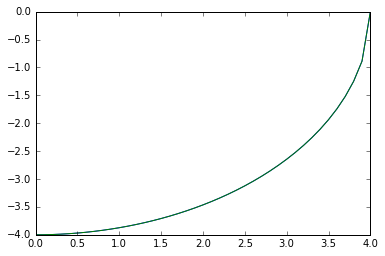

In [3]:
import pylab as pl
%pylab inline

x= numpy.linspace(0,10,101)
print x
y= sqrt(16-(x**2))
pl.plot(x, -y,)
pl.plot(x, -y,)

pl.show()

## Central differencing

In an attempt to derive a more accurate method, we use two Taylor series expansions; one in the positive $x$ direction from $x_0$, and one in the negative direction. Because we hope to achieve better than first order, we include an extra term in the series:

$$ f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2}f''(x_0) + O(h^3) $$

$$ f(x_0-h)=f(x_0)-hf'(x_0)+\frac{(-h)^2}{2}f''(x_0) + O((-h)^3) $$

Using the fact that $(-h)^2=h^2$ and the absolute value signs from the definition of $O$, this is equivalent to:

$$ f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2}f''(x_0) + O(h^3) $$
  
$$ f(x_0-h)=f(x_0)-hf'(x_0)+\frac{h^2}{2}f''(x_0) + O(h^3) $$
  
Remember that we are looking for an expression for $f'(x_0)$. Noticing the sign change between the derivative terms in the two equations, we subtract the bottom equation from the top equation to give:

$$ f(x_0+h)-f(x_0-h)=2hf'(x_0) + O(h^3) $$

Finally, rearrange to get an expression for $f'(x_0)$:

$$ f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h} + O(h^2) $$

We can see that by taking an interval symmetric about $x_0$, we have created a second-order approximation for the derivative of $f$. This symmetry gives the scheme its name: the central difference method. The figure below illustrates this scheme. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.  

Even without the analysis above it's hopefully clear visually why this should in general give a lower error than the forward difference approach. However the analysis of the two methods does tell us that as we halve $h$ the error should drop by a factor 4 rather than the 2 we get for the first-order forward differencing.

!["Central difference method for approximating $f'(x_0)$. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line."](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/central_diff.png)

## <span style="color:blue">Exercise 2.2: Compute first derivative using central differencing</span>

Use the data below to compute $f'(0.2)$ using central differencing:

$$f(0.1) = 0.078348$$
$$f(0.2) = 0.138910$$
$$f(0.3) = 0.192916$$

You should get 0.57284

In [32]:
(0.192916-0.078348)/2*0.1

0.005728400000000001

In [8]:
der= (0.192916-0.078348)/(2*0.1)
print der


0.57284


## <span style="color:blue">Example: Write a function to perform numerical differentiation</span>

As covered above, the formula

$$f^\prime(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

can be used to find an approximate derivative of a mathematical function $f(x)$ if $h$ is small. 

Write a function *diff*( *f*, *x*, *h*=1E-6) that returns the approximation of the derivative of a mathematical function represented by a Python function f(x).

Apply the above formula to differentiate $f(x) = e^x$ at x = 0, $f(x) = e^{−2x}$ at
x = 0, $f(x) = \cos(x)$ at x = 2$\pi$ , and $f(x) = \ln(x)$ at x = 1. 

Use $h = 0.01$. 

In each case, write out the error, i.e., the difference between the exact derivative and the result of the formula above.

In [72]:
from math import exp, cos, log, pi

def diff( f, x, h= 1E-6):
    num = f(x+h)- f(x-h)
    
    return num/(2.0*h)

h=0.01

print "Derivative %f. . Error is  %f." %(diff(exp, 0,0.01), abs(1-(diff(exp, 0,0.01))))

def g(x):
    return exp(-2*x)
print "Derivative %f. . Error is  %f." %(diff(g,0.,0.1), abs(-2-(diff(g,0.,0.1))))

Derivative 1.000017. . Error is  0.000017.
Derivative -2.013360. . Error is  0.013360.


In [50]:
# Write a function for numerical differentiation

from math import exp, cos, log, pi

def diff(f, x, h = 1E-6):
   numerator = f(x + h) - f(x - h)
   derivative = numerator/(2.0*h)
   return derivative
   
h = 0.01 # The step size

x = 0
f = exp
derivative = diff(f, x, h)
print "The approximate derivative of exp(x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative - 1)) 
# The 'abs' function returns the absolute value.

x = 0
# Here it is not possible to simply pass in the math module's exp function,
# so we need to define our own function instead.
def g(x):
   return exp(-2*x)
f = g
derivative = diff(f, x, h)
print "The approximate derivative of exp(-2*x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative - (-2.0)))

x = 2*pi
f = cos
derivative = diff(f, x, h)
print "The approximate derivative of cos(x) at x = 2*pi is: %f. The error is %f." % (derivative, abs(derivative - 0))

x = 1
f = log # By default, log(x) is the natural log (i.e. the log to the base 'e')
derivative = diff(f, x, h)
print "The approximate derivative of ln(x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative - 1))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2*x) at x = 0 is: -2.000133. The error is 0.000133.
The approximate derivative of cos(x) at x = 2*pi is: 0.000000. The error is 0.000000.
The approximate derivative of ln(x) at x = 0 is: 1.000033. The error is 0.000033.


## <span style="color:blue">Exercise 2.3: Compute the derivative of $\sin(x)$</span>

Compute 

$$\frac{d(\sin x)}{dx}\qquad\textrm{at}\qquad x = 0.8$$

using (a) forward differencing and (b) central differencing. 

Write some code that evaluates these derivatives for decreasing values of $h$ (start with $h=1.0$ and keep halving) and compare the values against the exact solution.

Plot the convergence of your two methods.

You should get something that looks like this

!["Convergence plot"](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/fd_cd_convergence.png)

Populating the interactive namespace from numpy and matplotlib
[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
[0.58625848083662813, 0.66803797875585336, 0.68947199332671527, 0.69489378588445749, 0.69625321283253339, 0.69659331860965423, 0.69667836062464161, 0.69669962210165437, 0.69670493753173446, 0.69670626639305056]
[0.11044822851053726, 0.02866873059131203, 0.007234716020450116, 0.0018129234627078938, 0.00045349651463200136, 0.00011339073751115425, 2.8348722523774406e-05, 7.0872455110171373e-06, 1.771815430928747e-06, 4.4295411483208369e-07]


`%matplotlib` prevents importing * from pylab and numpy


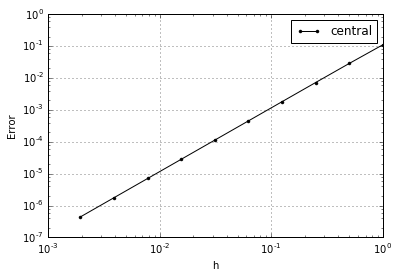

In [101]:
from math import sin,cos
import numpy as np
%pylab inline
import pylab as py

def cen(f,x,h):
    num= f(x+h)-f(x-h)
    return num/(2.*h)

half=[]
h=2
for i in range (10):
    
    h= h/2.
    half.append(h)
print half

cent=[]
for i in half:
    cent.append(cen(f=sin,x=0.8,h=i))
    
print cent

cen_errors=[]
for i in cent:
    lol= abs(i-0.6967067093471654)
    cen_errors.append(lol)
print cen_errors

py.loglog(half,cen_errors, 'k.-', label = 'central')
xlabel('h'), ylabel('Error'), grid(True) 
pylab.legend(loc='best')

Populating the interactive namespace from numpy and matplotlib
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
[0.44021516936849314, 0.20430252031182516, 0.096438170569189241, 0.046589330952833796, 0.022863577981832917, 0.011321167522070352, 0.0056325791629248112, 0.0028092452230310538, 0.0014006087543854129, 0.00069986350483797199]


`%matplotlib` prevents importing * from pylab and numpy


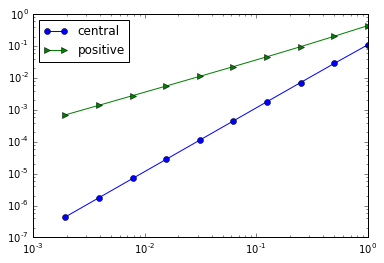

In [2]:
from math import sin,cos
import numpy as np
%pylab inline
import pylab as py 

def diff(f, x, h = 1E-6):
   numerator = f(x + h) - f(x - h)
   derivative = numerator/(2.0*h)
   return derivative



h = np.array([1,0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.0039, 0.00195])


Z=[]
x = 0.8
f = sin
derivative = diff(f, x, h)
for i in derivative:
    Z.append(abs(cos (0.8)-i))
    
def diffp(f, x, h = 1E-6):
   numerator = f(x + h)-f(x)
   derivativep = numerator/(h)
   return derivativep

W=[]
x = 0.8
f = sin
derivativep = diffp(f, x, h)
for i in derivativep:
    W.append(abs(cos (0.8)-i))
print W

py.loglog(h, Z,marker='o',label='central')
py.loglog(h, W,marker=">" ,label='positive')

py.legend(loc='best')

In [25]:
H=[]
n=1
z=2.0

while n <=10:
    z= z/2
    n=n+1
    H.append(z)
print H   


[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]


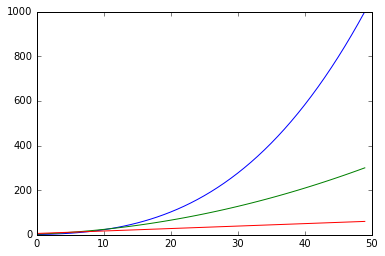

## Calculating second derivatives

Numerical differentiation may be extended to the second derivative by noting that the second derivative is the derivative of the first derivative. That is, if we define a new function $g$ for a second, where:

$$ g(x)=f'(x) $$

then

$$ f''(x)=g'(x) $$

and so we can just apply our differencing formulae twice in order to achieve a second derivative (and so on for even higher  derivatives).

We have noted above that the central difference method, being second-order accurate, is superior to the forward difference method so we will choose to extend that.

In order to calculate $f''(x_0)$ using a central difference method, we first calculate $f'(x)$ for each of two half intervals, one to the left of $x_0$ and one to the right:

$$ f'\left(x_0+\frac{h}{2}\right)\approx\frac{f(x_0+h)-f(x_0)}{h} $$
$$  f'\left(x_0-\frac{h}{2}\right)\approx\frac{f(x_0)-f(x_0-h)}{h} $$

[Of course the things on the RHS are first-order forward and backward differences if we were to consider the LHS at $x_0$.
However, by considering the LHS at $x_0\pm h/2$ they are in this case clearly second-order *central* differences where the denominator of the RHS is $2\times (h/2)$.]

We can now calculate the second derivative using these two values. Note that we know $f'(x)$ at the points $x_0\pm{h}/{2}$, which are only $h$ rather than $2h$ apart. Hence:

$$
\begin{align}
    f''(x_0)&\approx\frac{f'(x_0+\frac{h}{2})-f'(x_0-\frac{h}{2})}{h}\\
    &\approx\frac{\frac{f(x_0+h)-f(x_0)}{h}-\frac{f(x_0)-f(x_0-h)}{h}}{h}\\
    &\approx\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}
\end{align}$$

## <span style="color:blue">Exercise 2.4: Compute second derivative</span>

Calculate the second derivative $f''$ at $x = 1$ using the data below:

$f(0.84) = 0.431711$

$f(0.92) = 0.398519$

$f(1.00) = 0.367879$

$f(1.08) = 0.339596$

$f(1.16) = 0.313486$

You should get 0.36828

In [110]:
h=0.16
f_x0ph= 0.313486
f_x0= 0.367879
f_x0mh= 0.431711

print "%f." %((f_x0ph-2*f_x0+f_x0mh)/h**2)

print "%f." %((0.339596-2*0.367879+0.398519)/0.08**2)
 

0.368711.
0.368281.


In [47]:
h= (0.08)

def der2(x0,h):
    numerator= 0.339596-(2*0.367879)+0.398519
    return numerator/(h)**2
print der2(1,0.08)

print (0.313486-(2*0.339596)+0.367879)/(h)**2

0.36828125
0.33953125


In [114]:
36./3.
11./9

1.2222222222222223

## Aside: Non-central differencing and differentiation by polynomial fit

In this particular case we were given more data than we actually used. An alternative approach would be to use *non-centred differencing*, e.g. the following is also a valid approximation to the second derivative

$$
\begin{align}
    f''(x_0)\approx\frac{f(x_0+2h)-2f(x_0+h)+f(x_0)}{h^2}
\end{align}$$

This can come in handy if we need to approximate the value of derivatives at or near to a boundary where we don't have data beyond that boundary.

If we wanted to use all of this data, an alternative would be to fit a polynomial to this data, and then differentiate this analytical expression exactly to approximate the derivative at any point between 0.84 and 1.16 (recalling that extrapolation is dangerous).

## Numerical methods for ODEs

One of the most important applications of numerical mathematics in the sciences is the numerical solution of ordinary differential equations (ODEs). This is a vast topic which rapidly becomes somewhat advanced, so we will restrict ourselves here to a very brief introduction to the solution of first order ODEs. A much more comprehensive treatment of this subject is to be found in the Numerical Methods 2 module.

Suppose we have the general first-order ODE:

\begin{align}
x'(t)&=f(x(t),t) \\
x(t_0)&=x_0
\end{align}

[Notation: For $x=x(t)$, $\frac{dx}{dt}=x'=\dot{x}$.]

That is, the derivative of $x$ with respect to $t$ is some known function of $x$ and $t$, and we also know the initial condition of $x$ at some initial time $t_0$.

If we manage to solve this equation analytically, the solution will be a function $x(t)$ which is defined for every $t>t_0$. In common with all of the numerical methods we will encounter in this module, our objective is to find an approximate solution to the ODE at a finite set of points. In this case, we will attempt to find approximate solutions at $t=t_0,t_0+h,t_0+2h,t_0+3h,\ldots$.

It is frequently useful to think of the independent variable, $t$, as representing time. A numerical method steps forward in time units of $h$, attempting to calculate $x(t+h)$ in using the previously calculated value $x(t)$. 

### Euler's method

To derive a numerical method, we can first turn once again to the Taylor
series. In this case, we could write:

$$ x(t+h)=x(t)+h x'(t) + O(h^2) $$

Using the definition of our ODE above, we can substitute in for $x'(t)$:

$$ x(t+h)=x(t)+h f(x(t),t)+ O(h^2)$$

Notice that the value of $x$ used in the evaluation of $f$ is that at time $t$. This simple scheme is named **Euler's method** after the 18th century Swiss mathematician, Leonard Euler. 

This is what is known as an explicit method, because the function $f$ in this relation is evaluated at the old time level $t$
-- i.e. we have all the information required at time $t$ to explicitly compute the right-hand-side,
and hence easily find the new value for $x(t+h)$. This form of the method is therefore more correctly called either Explicit Euler or Forward Euler.  We could also evaluate the RHS at some time between $t$ and $t+h$ (in the case of $t+h$ this method is called Implicit or Backward Euler) this is more complex to solve for the new $x(t+h)$ but can have advantageous accuracy and stability properties.

The formula given is used to calculate the value of $x(t)$ one time step forward from the last known value. The error is therefore the local truncation error. If we actually wish to know the value at some fixed time $T$ then we will have to calculate $(T-t_0)/h$ steps of the method. This sum over $O(1/h)$ steps results in a global truncation error for Euler's method of $O(h)$. In other words, Euler's method is only first-order accurate -- if we halve $h$ we will need to do double the amount of work and the error should correspondingly halve; if we had a second-order method we would expect the error to reduce by a factor of 4 for every doubling in effort!

To illustrate Euler's method, and convey the fundamental idea of all time stepping methods, we'll use Euler's method to solve one of the simplest of all ODEs:

$$ x'(t)=x(t) $$
$$ x(0)=1 $$

We know, of course, that the solution to this equation is $x(t)=e^t$, but let's ignore that for one moment and evaluate $x(0.1)$ using Euler's method with steps of $0.05$. The first step is:

$$\begin{align}
  x(0.05)&\approx x(0)+0.05x'(0)\\
  &\approx1+.05\times1\\
  &\approx 1.05
\end{align}$$

Now that we know $x(0.05)$, we can calculate the second step:

$$
\begin{align}
  x(0.1)&\approx x(0.05)+0.05x(0.05)\\
  &\approx 1.05+.05\times1.05\\
  &\approx 1.1025
\end{align}$$

Now the actual value of $e^{0.1}$ is around $1.1051$ so we're a couple of percent off even over a very short time interval and only a couple of steps of the algorithm.

## <span style="color:blue">Exercise 2.5: Implementing Forward Euler's method</span>

Write a function *euler*( *f*, *x0*, *t0*, *t_max*, *h*) that takes as arguments the function $f(x,t)$ on the RHS of our ODE,
an initial value for $x$, the start and end time of the integration, and the time step.

Use it to integrate the following ODE problems up to time $t=10$

$$x'(t)=x(t),\quad x(0)=1$$

and 

$$x'(t)=\cos(t),\quad x(0)=0$$

and plot the results.  A template to get you started is below.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


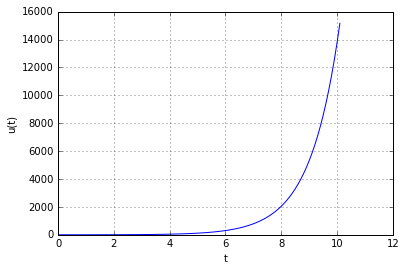

In [7]:
%pylab inline

def euler(f,u0,t0,t_max,h):
    u=u0; t=t0
    # these lists will store all solution values 
    # and associated time levels for later plotting
    u_all=[x0]; t_all=[t0]
    
    
    while t<t_max:
        u= u+ h*f(u,t)
        u_all.append(u)
        t=t+h
        t_all.append(t)
    
    
    
    
    
    
    return(u_all,t_all)


def f(u,t):
    val = u
    return val

(u_all,t_all) = euler(f,1.0,0.0,10.0,0.1)

plot(t_all, u_all)
xlabel('t');ylabel('u(t)');grid(True)
show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


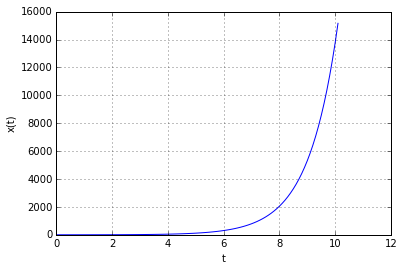

In [17]:
%pylab inline

def euler(f,x0,t0,t_max,h):
    x=x0; t=t0
    # these lists will store all solution values 
    # and associated time levels for later plotting
    x_all=[x0]; t_all=[t0]
    
    
    while t<t_max:
        x = x+h*f(x,t)
        x_all.append(x)
        t = t + h
        t_all.append(t)
        
    
    
    
    
    
    
    return(x_all,t_all)


def f(x,t):
    val = x
    return val

#def f(x,t):
    return cos(t)


(x_all,t_all) = euler(f,1.0,0.0,10.0,0.1)

plot(t_all, x_all)
xlabel('t');ylabel('x(t)');grid(True)
show()

### Heun's method

Euler's method is first-order accurate because it calculates the derivative using only the information available at the beginning of the time step. As we observed previously, higher-order convergence can be obtained if we also employ information from other points in the interval. Heun's method may be derived by attempting to use derivative information at both the start and the end of the interval:

$$
\begin{align}
  x(t+h)&\approx x(t)+\frac{h}{2}\left(x'(t)+x'(t+h)\right)\\
  &\approx x(t)+\frac{h}{2}\big(f(x,t)+f(x(t+h),t+h)\big)
\end{align}$$

The difficulty with this approach is that we now require $x(t+h)$ in order to calculate the final term in the equation, and that's what we set out to calculate so we don't know it yet! So at this point we have an example of an implicit algorithm and at this stage the above ODE solver would be referred to as the trapezoidal method if we could solve it exactly for $x(t+h)$.

Perhaps the simplest solution to this dilemma, the one adopted in Heun's method, is to use a first guess at $x(t+h)$ calculated using Euler's method:

$$ \tilde{x}(t+h)=x(t)+hf(x,t) $$

This first guess is then used to solve for $x(t+h)$ using:

$$ x(t+h)\approx x(t)+\frac{h}{2}\big(f(x,t)+f(t+h,\tilde{x}(t+h))\big)$$

The generic term for schemes of this type is **predictor-corrector**. The initial calculation of $\tilde{x}(t+h)$ is used to predict the new value of $x$ and then this is used in a more accurate calculation to produce a more correct value. 

Note that Heun's method is $O(h^2)$, i.e. a second-order method.

## <span style="color:blue">Exercise 2.6: Implementing Heun's method</span>

Repeat the previous exercise for this method.

For some ODEs you know the exact solution to compare the errors between Euler's and Heun's method, and how they vary with time step.

You should be able to get a plot that looks like this for the case $x'=x$

!["Comparison between the Euler and Heun method for the solution of a simple ODE."](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/euler_vs_heun.png)

In [ ]:
def heun(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0]
    
    while t<t_max:
        ue= u + h*f(u,t)
        u= u+ h*0.5*(f(u,t)+ f(t+h,ue))
        u = u + 0.5*h*(f(u,t) + f(ue,t+h))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


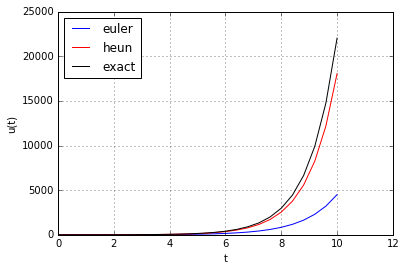

In [3]:
%pylab inline
import math

def euler(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
            u = u + h*f(u,t)
            u_all.append(u)
            t = t + h
            t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + h*f(u,t)
        u= u + (h/2.0)*(f(u,t)+f(ue, t+h)) #avarage of 2 steps, btw the old and updated
        u_all.append(u)
        t = t + h
        t_all.append(t)              
    return(u_all,t_all)
                     
                       
def f1(u,t):
    val = u
    return val

h = 0.4
u0 = 1.0
t0 = 0.0
tf = 10.0

(u_all,t_all) = euler(f1,u0,t0,tf,h)
plot(t_all, u_all,'b',label='euler')
(u_all,t_all) = heun(f1,u0,t0,tf,h)
plot(t_all, u_all,'r',label='heun')

plot(t_all, numpy.exp(t_all),'k',label='exact')
xlabel('t');ylabel('u(t)');grid(True);pylab.legend(loc='best')
show()                       

## Numerical Methods II

Note that you will do a lot more on the numerical solution of ODEs (and also extend to the solution of PDEs) in the Numerical Methods II course.

Populating the interactive namespace from numpy and matplotlib


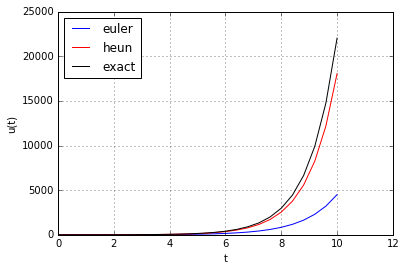

In [2]:
%pylab inline
import math

def euler(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + h*f(u,t)
        u_all.append(u)
        t = t + h
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + h*f(u,t) # euler guess
        u = u + 0.5*h*(f(u,t) + f(ue,t+h))
        u_all.append(u)
        t = t + h
        t_all.append(t)
    return(u_all,t_all)

def f(u,t):
    val = u
    return val

h = 0.4
u0 = 1.0
t0 = 0.0
tf = 10.0

(u_all,t_all) = euler(f,u0,t0,tf,h)
plot(t_all, u_all,'b',label='euler')
(u_all,t_all) = heun(f,u0,t0,tf,h)
plot(t_all, u_all,'r',label='heun')

plot(t_all, numpy.exp(t_all),'k',label='exact')
xlabel('t');ylabel('u(t)');grid(True);pylab.legend(loc='best')
show()

In [5]:
print "hello world"

hello world
